# **Data Analytics - Lab 1 - Random data visualisation and sampling**

Adrian Poniatowski, nr.401346

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import beta 

## Generate arrays with distributions

In [2]:
# uniform distribution on interval [0,1]
uniform = np.random.uniform(0, 1, 1000)

# normal distribution with mean mu=0 and standard deviation sigma=1
normal_1 = np.random.normal(0, 1, 1000)

# normal distribution with mean mu=0 and standard deviation sigma=10
normal_2 = np.random.normal(0, 10, 1000)

# beta distribution for the following pairs of parameters a,b in [(1,1), (2,2), (3,9)]
x = np.linspace(0, 1.0, 40)
beta11 = np.random.beta(1, 1, 1000)
pdf11 = beta.pdf(x, 1, 1)

beta22 = np.random.beta(2, 2, 1000)
pdf22 = beta.pdf(x, 2, 2)

beta39 = np.random.beta(3, 9, 1000)
pdf39 = beta.pdf(x, 3, 9)

# two-dimensional normal distributions with mean mu = [0,0]^T and covariance matrices A1 = [[1,0],[0,1]]; A2 = [[2,1],[1,2]]
multivariate_1 = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], 10000)

multivariate_2 = np.random.multivariate_normal([0, 0], [[2, 1], [1, 2]], 10000)

## Plot histograms for one dimensional distributions


### Uniform distribution on interval [0,1]

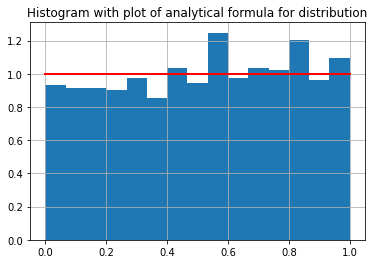

In [3]:
count, bins, ignored = plt.hist(uniform, 15, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.grid()
plt.title("Histogram with plot of analytical formula for distribution")
plt.show()

### Normal distribution with mean $\mu=0$ and standard deviation $\sigma=1$.

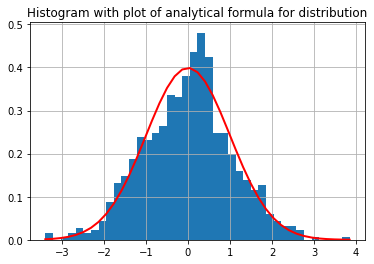

In [4]:
sigma = 1
mu = 0
count, bins, ignored = plt.hist(normal_1, 40, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.grid()
plt.title("Histogram with plot of analytical formula for distribution")
plt.show()

### Normal distribution with mean $\mu=0$ and standard deviation $\sigma=10$.

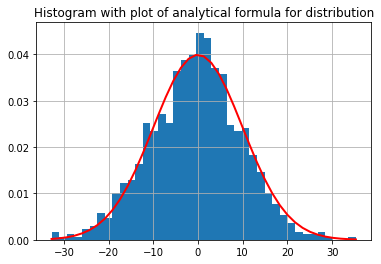

In [5]:
sigma = 10
mu = 0
count, bins, ignored = plt.hist(normal_2, 40, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.grid()
plt.title("Histogram with plot of analytical formula for distribution")
plt.show()

### Beta distribution for parameters $(\alpha,\beta)\in(1,1)$

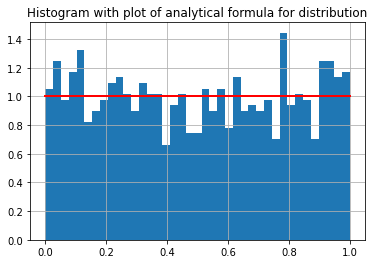

In [6]:
count, bins, ignored = plt.hist(beta11, 39, density=True)
plt.plot(bins, pdf11, linewidth=2, color='r')
plt.grid()
plt.title("Histogram with plot of analytical formula for distribution")
plt.show()

### Beta distribution for parameters $(\alpha,\beta)\in(2,2)$

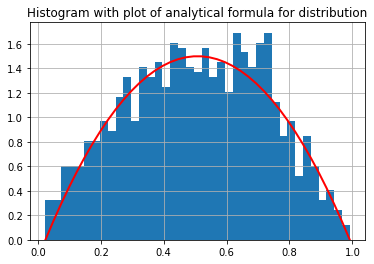

In [7]:
count, bins, ignored = plt.hist(beta22, 39, density=True)
plt.plot(bins, pdf22, linewidth=2, color='r')
plt.grid()
plt.title("Histogram with plot of analytical formula for distribution")
plt.show()

### Beta distribution for parameters $(\alpha,\beta)\in(3,9)$

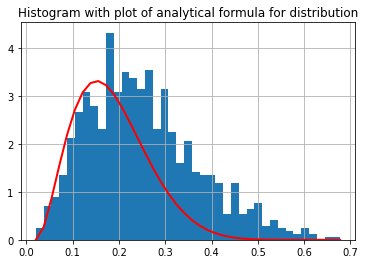

In [8]:
count, bins, ignored = plt.hist(beta39, 39, density=True)
plt.plot(bins, pdf39, linewidth=2, color='r')
plt.grid()
plt.title("Histogram with plot of analytical formula for distribution")
plt.show()

## Plot histograms for two-dimensional distributions

### Two-dimensional normal distribution with  mean $\mu=[0,0]^\mathsf{T}$ and covariance matrice

$\Sigma_1=\begin{bmatrix}1&0\\0&1\end{bmatrix}$


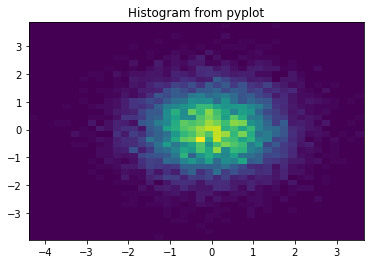

In [9]:
plt.hist2d(multivariate_1[:,0], multivariate_1[:,1], bins=40)
plt.title("Histogram from pyplot")
plt.show()

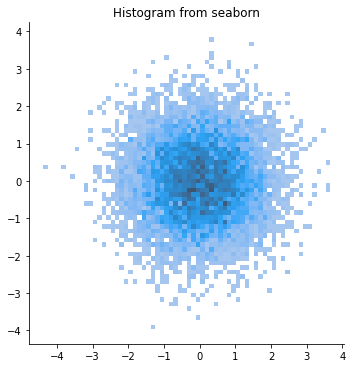

In [10]:
sns.displot(multivariate_1, x=multivariate_1[:,0], y=multivariate_1[:,1])
plt.title("Histogram from seaborn")
plt.show()

### Two-dimensional normal distribution with  mean $\mu=[0,0]^\mathsf{T}$ and covariance matrice

$\Sigma_2=\begin{bmatrix}2&1\\1&2\end{bmatrix}$

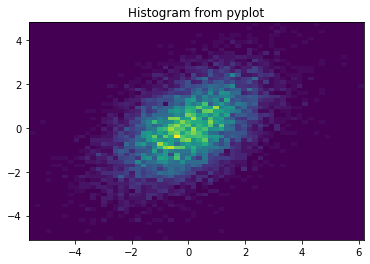

In [11]:
plt.hist2d(multivariate_2[:,0], multivariate_2[:,1], bins=60)
plt.title("Histogram from pyplot")
plt.show()

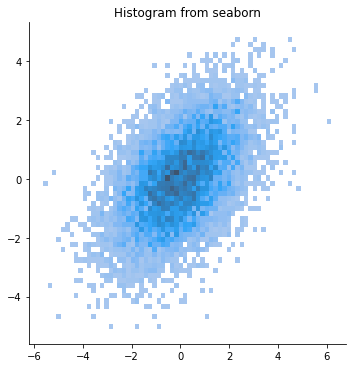

In [12]:
sns.displot(multivariate_1, x=multivariate_2[:,0], y=multivariate_2[:,1])
plt.title("Histogram from seaborn")
plt.show()

## Generate 1000 $y$ points from the following model
$
    \begin{aligned}
    y\sim{}& \mathrm{Normal}(\mu, \sigma)\\\\
    \mu={}& \alpha + \beta x\\\\
    \alpha\sim{}&\mathrm{Normal}(2,0.1)\\\\
    \beta\sim{}&\mathrm{Normal}(0.2,0.2)\\\\
    x\sim{}&\mathrm{Normal}(0,3)\\\\
    \sigma\sim{}&\mathrm{HalfNormal}(0,1)
    \end{aligned} $

In [13]:
alpha = np.random.normal(2, 0.1, 1000)
beta = np.random.normal(0.2, 0.2, 1000)
x = np.random.normal(0, 3, 1000)
sigma = np.abs(np.random.normal(0, 1, 1000))

mu = alpha + beta * x

y = np.random.normal(mu, sigma, 1000)

## Plot $y$ values as a function of $x$. Compare them with lines of $y=\alpha+\beta x$, plotted for $x$ between -6 and 6 for each of randomly sampled $\alpha$ and $\beta$ pair.

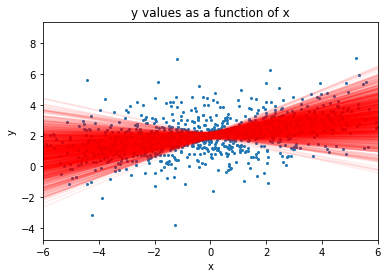

In [14]:
plt.scatter(x, y, s=4)
vec = np.linspace(-6, 6, 1000).reshape((-1,1))
plt.plot(np.ones((1,1000)) * vec, alpha + vec*beta, "r", alpha=0.075)
plt.xlim([-6, 6])
plt.title("y values as a function of x")
plt.xlabel("x")
plt.ylabel("y")
plt.show()